In [ ]:
#The goal: to review and apply matrices, while simultaneously understanding how quantum gates work from scratch.
# we try the bloch sphere with our eigenvectors in a superposition

In [ ]:
# We importing our tools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


Step 1: Create the Qubit We create a variable called theta that contains all possible angles between 0 and 2$\pi$. We obtain the coordinates using mathematical vector formulas and store them in a variable called coordinates. Then, we use Pandas to create a table with the transposed matrix of coordinates to translate the mathematical matrix into the database format that Pandas uses.

In [ ]:

theta = np.linspace(0, 2*np.pi, 100)
coordinates=np.array([np.cos(theta),np.sin(theta)])
coordinates

array([[ 1.00000000e+00,  9.97986676e-01,  9.91954813e-01,
         9.81928697e-01,  9.67948701e-01,  9.50071118e-01,
         9.28367933e-01,  9.02926538e-01,  8.73849377e-01,
         8.41253533e-01,  8.05270258e-01,  7.66044443e-01,
         7.23734038e-01,  6.78509412e-01,  6.30552667e-01,
         5.80056910e-01,  5.27225468e-01,  4.72271075e-01,
         4.15415013e-01,  3.56886222e-01,  2.96920375e-01,
         2.35758936e-01,  1.73648178e-01,  1.10838200e-01,
         4.75819158e-02, -1.58659638e-02, -7.92499569e-02,
        -1.42314838e-01, -2.04806668e-01, -2.66473814e-01,
        -3.27067963e-01, -3.86345126e-01, -4.44066613e-01,
        -5.00000000e-01, -5.53920064e-01, -6.05609687e-01,
        -6.54860734e-01, -7.01474888e-01, -7.45264450e-01,
        -7.86053095e-01, -8.23676581e-01, -8.57983413e-01,
        -8.88835449e-01, -9.16108457e-01, -9.39692621e-01,
        -9.59492974e-01, -9.75429787e-01, -9.87438889e-01,
        -9.95471923e-01, -9.99496542e-01, -9.99496542e-0

In [ ]:
#transpose the matrix to use in pandas
qubit_state = pd.DataFrame(data=coordinates.T,columns=['x','y'])

Step 2: Pauli Gate We create a Pauli NOT gate in matrix form and store it in a variable called pauli_x to get a "reflection" (or the inverse) of the qubit's vector.

In [ ]:
# Quantum Gate Pauli-X (NOT)

pauli_x = np.array([[0,1],[1,0]])

Step 3: Dot Product The dot product of our Pauli gate and our original vector results in a transformation to a new state.

In [ ]:
transforms_vectors =pauli_x @ coordinates

Step 4: Eigenvalues & Eigenvectors If the qubit is aligned with the eigenvectors' position, the Pauli gate will not rotate it. The value -1 indicates that it just gets inverted (phase flip), but it stays on the same axis.

In [ ]:
qubit_trasformed = pd.DataFrame(data=transforms_vectors.T,columns=['x','y'])

In [ ]:
det= np.linalg.det(pauli_x)
eigenvalues, eigenvectors =np.linalg.eig(pauli_x)

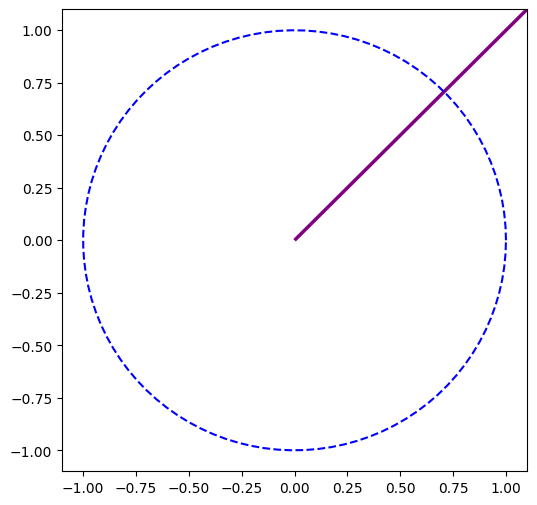

In [ ]:
fig, ax = plt.subplots(figsize=(6,6))

v1=eigenvectors[:,0]

v2=eigenvectors[:,1]

ax.plot(qubit_state['x'],qubit_state['y'],linestyle='--',color='blue')

ax.quiver(0,0,eigenvectors[0,0],eigenvectors[1,0],color='purple',scale=1,angles='xy', label= f'Eigen 1 (Val={eigenvalues[0]:.0f})')


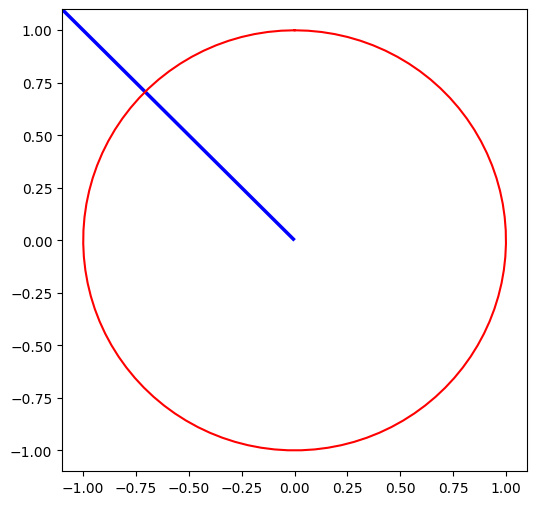

In [ ]:

fig, ax = plt.subplots(figsize=(6,6))
ax.plot(qubit_trasformed['x'],qubit_trasformed['y'],color='red',label='Transformed Qubit')

ax.quiver(0,0,eigenvectors[0,1],eigenvectors[1,1],color='blue',scale=1,angles='xy', label= f'Eigen 2 (Val={eigenvalues[1]:.0f})')


# The Experiment Visualization



> The **blue** circle represents all the possible states of a qubit before it is touched. The **red** circle represents the result of these states after applying energy.

We use our knowledge about Matrices to transform the space of our qubit; in this case, it only rotates.
Matrices Actually, a matrix is a logic gate. In the real world, we use laser or microwave pulses to create our logic gate, and the matrices describe perfectly how this pulse rotates the qubit vector.

Determinants In Mathematics, we use them to know how much the area changes. In quantum, this area must never change; consequently, the determinant results must be 1 (or -1 in case it creates an inversion).

Eigenvectors These are the vectors whose direction doesn't change, they only scale or invert. In quantum, they tell us what the characteristic states are, essentially the symmetry axes.



